In [1]:
import os 
import numpy as np
import keras
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import Conv2D, MaxPooling2D, Dropout, Activation
from keras.layers import Flatten, Dense, Activation
from keras.optimizers import SGD, Adam
from keras.models import Sequential
from keras.callbacks import EarlyStopping, ModelCheckpoint
import matplotlib.pyplot as plt
import time

Using TensorFlow backend.
/home/sandesh/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/sandesh/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/sandesh/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/sandesh/anaconda3/lib/python3.7/site-packages/t

In [2]:
current_dir = os.getcwd()
train_dir = os.path.join(current_dir, 'DevanagariHandwrittenCharacterDataset/Train')
test_dir = os.path.join(current_dir, 'DevanagariHandwrittenCharacterDataset/Test')

train_datasets = os.listdir(train_dir)
test_datasets = os.listdir(test_dir)
print(test_datasets[24])
len(train_datasets)

digit_6


46

In [3]:
train_dataset_count = 0
for i in train_datasets:
    data_path = os.path.join(train_dir, str(i))
    train_dataset_count += len(os.listdir(data_path))   
print(train_dataset_count)

test_dataset_count = 0
for i in test_datasets:
    data_path = os.path.join(test_dir, str(i))
    test_dataset_count += len(os.listdir(data_path))   
print(test_dataset_count)

78200
13800


In [4]:
batch_size = 32
img_rows, img_cols = 32,32
epochs = 100

In [5]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    zoom_range=0.2,
    fill_mode='nearest'
)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    color_mode='grayscale',
    target_size=(img_rows, img_cols),
    batch_size=batch_size,
    class_mode='categorical'
)

test_datagen = ImageDataGenerator(rescale=1./255)

test_generator = train_datagen.flow_from_directory(
    test_dir,
    color_mode='grayscale',
    target_size=(img_rows, img_cols),
    batch_size=batch_size,
    class_mode='categorical'
)



Found 78200 images belonging to 46 classes.
Found 13800 images belonging to 46 classes.


In [7]:
model = Sequential()

model.add(Conv2D(filters=32, kernel_size=(5,5),activation='relu',input_shape=(img_rows, img_cols, 1)))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(filters=32, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(rate=0.25))

model.add(Flatten())
model.add(Dense(units=128, activation='relu'))

model.add(Dense(units=len(train_datasets), activation='softmax'))

Instructions for updating:
Colocations handled automatically by placer.


In [8]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 28, 28, 32)        832       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 12, 12, 32)        9248      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 6, 6, 32)          0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 6, 6, 32)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 1152)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)              

In [9]:
early_stop = EarlyStopping(monitor='val_accuracy',
                          min_delta=0,
                           patience=10,
                           verbose=1,
                           mode='max',
                           restore_best_weights=True
                          )
check_point = ModelCheckpoint(
    'Handwritten_OCR.h5',
    monitor='val_accuracy',
    mode='max',
    save_best_only=True,
    verbose=1
)

callbacks=[check_point, early_stop]

In [10]:
model.compile(loss='categorical_crossentropy',
            metrics=['accuracy'],
            optimizer=Adam(lr=0.001)
             )

In [11]:
time1 = time.time()
history = model.fit_generator(
    train_generator, 
    validation_data=test_generator,
    epochs=epochs,
    steps_per_epoch=train_dataset_count/batch_size,
    verbose=1,
    callbacks=callbacks
    )
time2 = time.time()

Instructions for updating:
Use tf.cast instead.
Epoch 1/100
2444/2443 [==============================] - 80s 33ms/step - loss: 0.6850 - accuracy: 0.8029 - val_loss: 0.6476 - val_accuracy: 0.9209

Epoch 00001: val_accuracy improved from -inf to 0.92094, saving model to Handwritten_OCR.h5
Epoch 2/100
2444/2443 [==============================] - 70s 29ms/step - loss: 0.2461 - accuracy: 0.9250 - val_loss: 0.0435 - val_accuracy: 0.9549

Epoch 00002: val_accuracy improved from 0.92094 to 0.95493, saving model to Handwritten_OCR.h5
Epoch 3/100
2444/2443 [==============================] - 71s 29ms/step - loss: 0.1738 - accuracy: 0.9463 - val_loss: 0.3486 - val_accuracy: 0.9604

Epoch 00003: val_accuracy improved from 0.95493 to 0.96043, saving model to Handwritten_OCR.h5
Epoch 4/100
2444/2443 [==============================] - 73s 30ms/step - loss: 0.1401 - accuracy: 0.9562 - val_loss: 0.0172 - val_accuracy: 0.9688

Epoch 00004: val_accuracy improved from 0.96043 to 0.96884, saving model to Ha

In [12]:
print(f'{(time2 - time1)/60} mins')

38.01885438362758 mins


In [15]:
history.history.keys()

dict_keys(['val_loss', 'val_accuracy', 'loss', 'accuracy'])

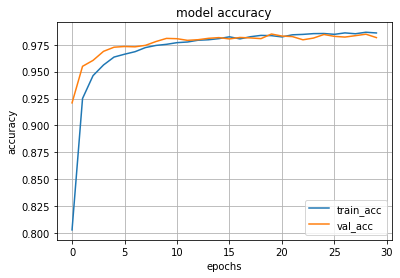

<Figure size 432x288 with 0 Axes>

In [20]:
#Accuracy plotting
plt.plot(history.history['accuracy'], label='train_acc')
plt.plot(history.history['val_accuracy'], label='val_acc')
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epochs')
plt.legend()
plt.grid()
plt.show()
plt.savefig('model_acc.png')

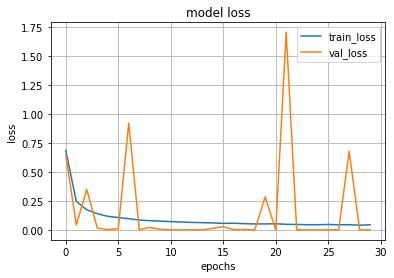

<Figure size 432x288 with 0 Axes>

In [21]:
#Loss plotting
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epochs')
plt.legend()
plt.grid()
plt.show()
plt.savefig('model_loss.png')